In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
!ncdump -h KPP_fields.nc

netcdf KPP_fields {
dimensions:
	lon = 72 ;
	lat = 46 ;
	lev = 72 ;
	nspec = 240 ;
	nphy = 4 ;
	nphotol = 130 ;
	nreact = 725 ;
variables:
	double C_before(lev, lat, lon, nspec) ;
	double C_after(lev, lat, lon, nspec) ;
	double PHOTOL(lev, lat, lon, nphotol) ;
	double PHY(lev, lat, lon, nphy) ;
	double RCONST(lev, lat, lon, nreact) ;
}


In [3]:
!ncdump -h RCONST.nc

netcdf RCONST {
dimensions:
	lon = 72 ;
	lat = 46 ;
	lev = 72 ;
	nreact = 725 ;
variables:
	double RCONST(lev, lat, lon, nreact) ;
}


In [4]:
ds = xr.open_dataset('./KPP_fields.nc')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact, nspec
Data variables:
    C_before  (lev, lat, lon, nspec) float64 ...
    C_after   (lev, lat, lon, nspec) float64 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 ...
    PHY       (lev, lat, lon, nphy) float64 ...
    RCONST    (lev, lat, lon, nreact) float64 ...

In [5]:
dr = xr.open_dataarray('./RCONST.nc')
dr

<xarray.DataArray 'RCONST' (lev: 72, lat: 46, lon: 72, nreact: 725)>
[172886400 values with dtype=float64]
Dimensions without coordinates: lev, lat, lon, nreact

In [6]:
np.allclose(dr[...,0:6], ds['RCONST'][...,0:6])

False

In [7]:
def compare(n, l):
    fig, axes = plt.subplots(1, 2, figsize=[12, 3])
    ds['RCONST'][l,...,n].plot(ax=axes[0])
    dr[l,...,n].plot(ax=axes[1])

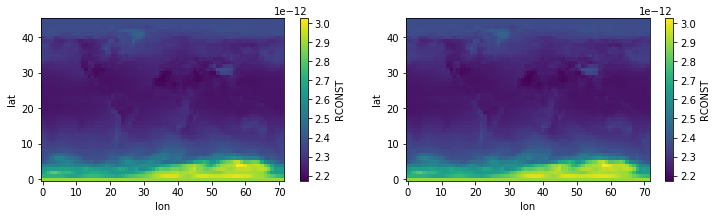

In [8]:
compare(20, 0)

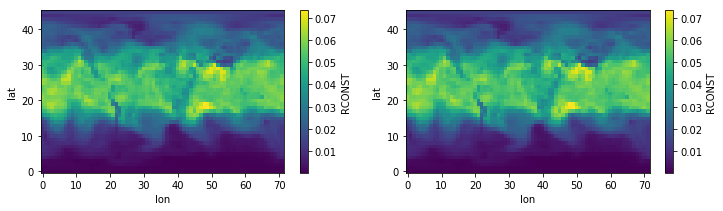

In [9]:
compare(535, 20)

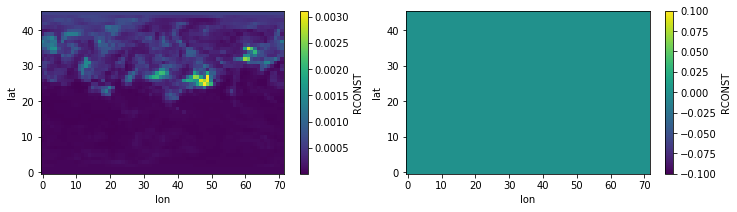

In [10]:
compare(536, 20) # Het rate is not computed